## **MNIST Detection**

**Benedictus Bayu Pramudhito**

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


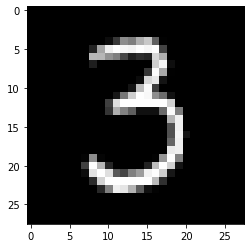

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)

plt.imshow(X_train[50], cmap=plt.get_cmap('gray'))

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

## Feature Engineering

In [4]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [5]:
print(X_train.shape)

(60000, 28, 28, 1)


In [6]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [7]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

## Multilayer Perceptron (Neural Network)

In [11]:
base_model = Sequential()

base_model.add(Flatten(input_shape=(28, 28, 1)))
base_model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
base_model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

base_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

base_model.summary()

history = base_model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2993 - accuracy: 0.9141 - val_loss: 0.1634 - val_accuracy: 0.9547
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1423 - accuracy: 0.9585 - val_loss: 0.1184 - val_accuracy: 0.9655
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1035 - accu

In [12]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [13]:
history_dataframe = pd.DataFrame(history.history)
history_dataframe['epoch'] = history.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.299281,0.914133,0.163369,0.9547,0
1,0.142258,0.958517,0.118388,0.9655,1
2,0.103486,0.970083,0.099151,0.9716,2
3,0.081314,0.975650,0.089279,0.9741,3
4,0.066053,0.980567,0.080943,0.9749,4
...,...,...,...,...,...
95,0.000523,1.000000,0.092029,0.9794,95
96,0.000517,1.000000,0.092072,0.9793,96
97,0.000510,1.000000,0.092047,0.9796,97
98,0.000503,1.000000,0.092245,0.9795,98


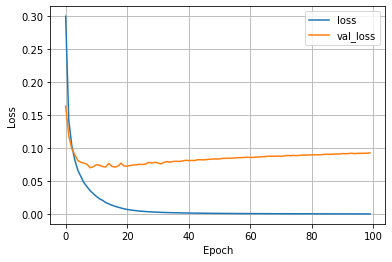

In [14]:
plot_loss(history) # epoch vs loss graph

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model multilayer perceptron, terlihat bahwa garis lossnya memang sudah mencapai titik terendahnya dengan 100 epoch, tetapi grafik val_loss nya cenderung mengalami peningkatan. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 20-21, tepat sebelum val_loss nya mengalami peningkatan dimana saat epoch 21 diperoleh val_loss: 0.0727 dan val_accuracy: 0.9796

In [ ]:
#loss, accuracy = base_model.evaluate(X_test,  y_test, verbose=2)

#print("Test accuracy:", accuracy)
#print("Test loss:", loss)

## Convolutional Neural Network (CNN)

In [16]:
# Adapted from: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))) # Convolution, 32 filters, masing-masing dengan kernel 3x3

model.add(MaxPooling2D((2, 2))) # Pooling

model.add(Flatten()) # Flatten hasil output

# Fully connected layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) # Activation relu dipakai, ini salah satu function yang paling banyak dipakai
model.add(Dense(10, activation='softmax')) # Activation softmax dipakai untuk classification, nilai 10 karena terdapat 10 class (0-9)

opt = SGD(lr=0.01, momentum=0.9) # Optimizer (Stochastic Gradient Descent), untuk mencari minima dari grafik fungsi loss

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) # Loss Function

model.summary()

history_cnn = model.fit(X_train, y_train, batch_size=32, validation_data=(X_test, y_test), epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1694 - accuracy: 0.9473 - val_loss:

In [ ]:
#loss, accuracy = model.evaluate(X_test,  y_test, verbose=2)

#print("Test accuracy:", accuracy)
#print("Test loss:", loss)

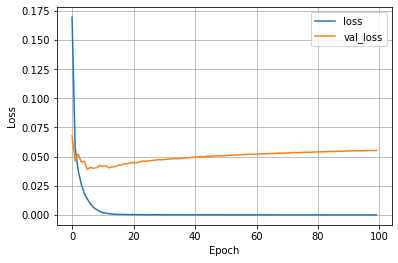

In [18]:
plot_loss(history_cnn)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model CNN single layer, terlihat bahwa garis lossnya memang sudah mencapai titik terendahnya dengan 100 epoch, tetapi grafik val_loss nya cenderung mengalami peningkatan setelah sekitar 15 epoch. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 15-16, tepat sebelum val_loss nya mengalami peningkatan dimana saat epoch 15 diperoleh val_loss: 0.0414 dan val_accuracy: 0.9884

**Deep Learning with Deeper Layer**

In [19]:
model = Sequential([Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
                   MaxPooling2D((2,2)),
                   Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'),
                   MaxPooling2D((2,2)),
                   Flatten(),
                   Dense(100, activation='relu', kernel_initializer='he_uniform'),
                   Dense(10, activation='softmax')
])

In [20]:
model.compile(optimizer=SGD(lr=0.01, momentum=0.9), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
model.summary()

history_cnn_1 = model.fit(
    X_train,
    y_train,
    batch_size=32,
    validation_data = (X_test, y_test),
    epochs=100
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               160100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [22]:
history_df_cnn1 = pd.DataFrame(history_cnn_1.history)
history_df_cnn1['epoch'] = history_cnn_1.epoch
history_df_cnn1

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.126752,0.960600,0.064664,0.9795,0
1,0.043158,0.986283,0.038402,0.9871,1
2,0.029112,0.990850,0.036785,0.9889,2
3,0.021772,0.993167,0.029294,0.9903,3
4,0.015635,0.995167,0.042512,0.9858,4
...,...,...,...,...,...
95,0.000011,1.000000,0.045767,0.9921,95
96,0.000011,1.000000,0.045746,0.9922,96
97,0.000011,1.000000,0.045817,0.9921,97
98,0.000011,1.000000,0.045834,0.9922,98


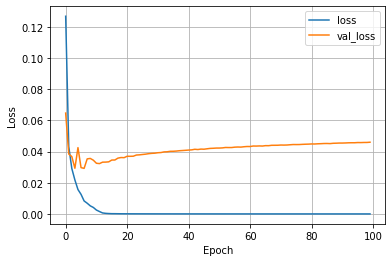

In [23]:
plot_loss(history_cnn_1)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model CNN dengan deeper layer, terlihat bahwa garis lossnya memang sudah mencapai titik terendahnya dengan 100 epoch, tetapi grafik val_loss nya cenderung mengalami peningkatan setelah sekitar 15 epoch. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 15-16, tepat sebelum val_loss nya mengalami peningkatan dimana saat epoch 15 diperoleh val_loss: 0.0334 dan val_accuracy: 0.9925

Nilai akurasi pada model CNN single layer sebesar 0.9884 dan pada model CNN dengan deeper layer nilainya sedikit lebih besar yakni 0.9925. Hal ini bisa disebabkan karena layer yang digunakan lebih dalam sehingga feature yang diambil pun bisa lebih banyak. Walaupun layer yang lebih dalam belum tentu menghasilkan model yang lebih baik, akan tetapi untuk dataset MNIST ini penggunaan layer yang lebih dalam mampu meningkatkan performa dari model